In [1]:
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import tensorflow as tf
from gym import wrappers
import gym
import numpy as np
import pickle
from config import C51DQNConfig
from c51 import C51DQN
import random
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

In [2]:
print(tf.__version__)

1.15.0


In [3]:
def map_scores(dqfd_scores=None, ddqn_scores=None, xlabel=None, ylabel=None):
    if dqfd_scores is not None:
        plt.plot(dqfd_scores, 'r')
    if ddqn_scores is not None:
        plt.plot(ddqn_scores, 'b')
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    plt.show()

In [4]:
def Pacman_C51DQN(index, env):
    with tf.variable_scope('DQfD_' + str(index)):
        agent = C51DQN(env, C51DQNConfig())
    scores = []
    for e in range(C51DQNConfig.episode):
        done = False
        score = 0  # sum of reward in one episode
        state = env.reset()
        # while done is False:
        last_lives = 1 # minimum lives needed to keep playing
        #throw = True # don't need throw -- just take an action
        items_buffer = []
        while not done:
            # Render screen in notebook
            screen = env.render(mode='rgb_array')
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            
            action = agent.greedy_action(state)
            print ('action:', action)
            next_state, real_reward, done, info = env.step(action)
            lives = info['ale.lives']
            train_reward = -1 if lives < last_lives else real_reward # give a -1 reward if agent actions lost a life
            score += real_reward
            print('real_reward: ', real_reward)
            print('train_reward: ', train_reward)
            print('score: ', score)
            #throw = lives < last_lives
            last_lives = lives
            # agent.train(state, train_reward, [action], next_state, 0.1)
            items_buffer.append([state, [action], next_state, 0.1])
            state = next_state
            if train_reward != 0:  # train when miss the ball or score or throw the ball in the beginning
                print ('len(items_buffer):', len(items_buffer))
                for item in items_buffer:
                    agent.train(item[0], train_reward, item[1], item[2], item[3])
                items_buffer = []
        scores.append(score)
        print ("episode:", e, "  score:", score)
        agent.save_model()
        # if np.mean(scores[-min(10, len(scores)):]) > 495:
        #     break
    return scores

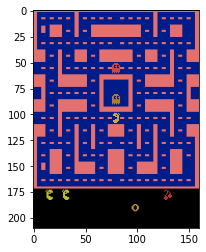

self.epsilon:  0.891935939497573
action: 4
real_reward:  0.0
train_reward:  0.0
score:  0.0


In [ ]:
env = gym.make('MsPacman-v0')
# env = gym.make(NoisyNetDQNConfig.ENV_NAME)
# env = wrappers.Monitor(env, '/tmp/CartPole-v0', force=True)
C51DQN_sum_scores = np.zeros(C51DQNConfig.episode)
for i in range(C51DQNConfig.iteration):
    scores = Pacman_C51DQN(i, env)
    c51_sum_scores = [a + b for a, b in zip(scores, C51DQN_sum_scores)]
C51DQN_mean_scores = C51DQN_sum_scores / C51DQNConfig.iteration
with open('./C51DQN_mean_scores.p', 'wb') as f:
    pickle.dump(C51DQN_mean_scores, f, protocol=2)